# Homework 5 - Assignment 3

### Response authored by: JKtours (jlk635)

In [1]:
#Usual packages for import including spicy_stats and seaborn

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats
import seaborn as sns
import statsmodels.api as sm


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Data read-in

In [2]:

dfFirearm = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/World_firearms_murders_and_ownership.csv', header = 0)
dfMassShooting = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/data-pvLFI.csv', header = 0)
dfPopulation = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows = 4, header = 0)
dfGDP = pd.read_csv('https://raw.githubusercontent.com/jkastelan/PUI2017_jlk635/master/HW5_jlk635/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows = 4, header = 0)


In [3]:
dfMassShooting['Country'][2] = 'Belgium'
dfMassShooting['Country'][9] = 'Netherlands'

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Data munging - replace column names and drop columns not needed

In [4]:
df_ = dfPopulation[['Country Name', '2016']]
df_.rename(columns={'2016': 'pop'}, inplace=True)
dfGDP_ = dfGDP[['Country Name', '2016']]
dfGDP_.rename(columns={'2016': 'gdp'}, inplace=True)
dfFirearm_ = dfFirearm[['Country/Territory', 'Number of homicides by firearm','Average total all civilian firearms']]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


### Data munging - merge datasets on Country (key), only countries

In [5]:
df_ = df_.merge(dfGDP_, on='Country Name')
df_ = df_.merge(dfFirearm_, left_on='Country Name', right_on='Country/Territory')
df_ = df_.drop(['Country/Territory'], axis=1)
df_ = df_.merge(dfMassShooting, left_on='Country Name', right_on='Country')




In [7]:
df_.head()



,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,24127159.0,1.204616e+12,30.0,3050000.0,Australia,15.0,4
1,Austria,8747358.0,3.864278e+11,18.0,2500000.0,Austria,30.4,1
2,Belgium,11348159.0,4.663657e+11,70.0,1800000.0,Belgium,17.2,2
3,Canada,36286425.0,1.529760e+12,173.0,9950000.0,Canada,30.8,4
4,Switzerland,8372098.0,6.598272e+11,57.0,3400000.0,Switzerland,45.7,2


# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


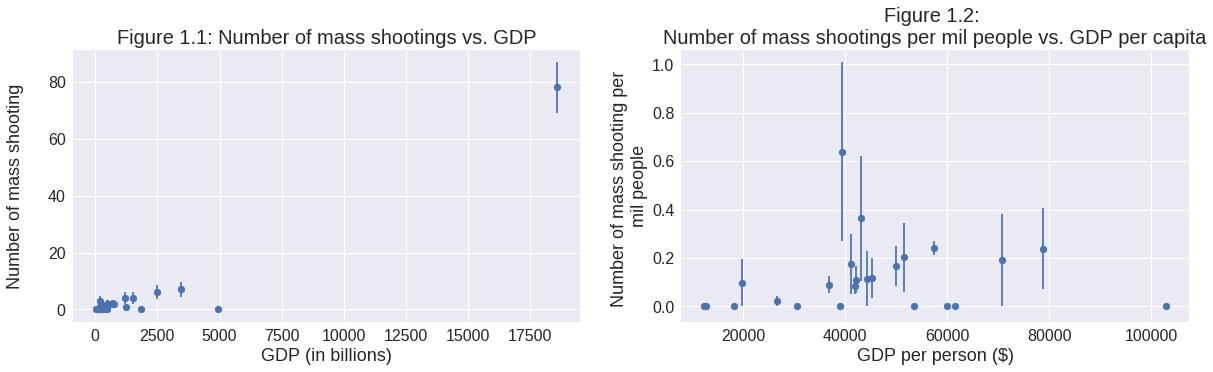

Number of mass shooting per mil people vs GDP per person, errors represent Poisson statistics.



In [11]:
fig = pl.figure(figsize=(20,5)) 
ax = fig.add_subplot(121)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 1.1: \nNumber of mass shootings vs. GDP", fontsize=20)
ax.set_xlabel("GDP (in billions)", fontsize=18)
ax.set_ylabel("Number of mass shooting\n", fontsize=18)
ax.set_ylim()

print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## NEED SHOOTINGS PER PERSON

df_['shootingspp'] = df_["Number of mass shootings"] / (df_['pop'] / 1e6)
df_['gpdpp'] = df_['gdp'] / df_['pop']


ax = fig.add_subplot(122)

scatter = ax.scatter(df_['gpdpp'], df_['shootingspp'])
ax.errorbar(df_['gpdpp'], df_['shootingspp'], 
            yerr = np.sqrt(df_['Number of mass shootings'])/ (df_['pop'] / 1e6), fmt = '.')
ax.tick_params(axis='both',labelsize=16)
pl.title("Figure 1.2: \nNumber of mass shootings per mil people vs. GDP per capita", fontsize=20)
ax.set_xlabel("GDP per person ($)", fontsize=18)
ax.set_ylabel("Number of mass shooting per \nmil people", fontsize=18)
ax.set_ylim()
pl.show()
print ("Number of mass shooting per mil people vs GDP per person, " + 
       "errors represent Poisson statistics.\n" )


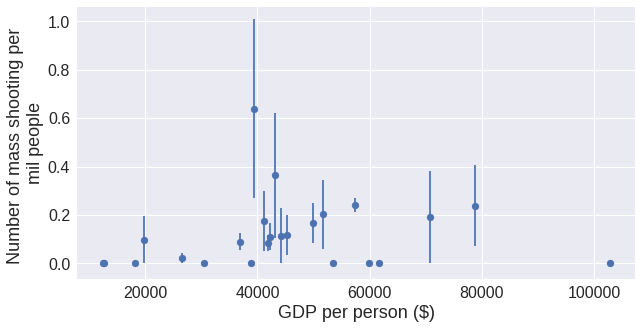

Number of mass shooting per mil people vs GDP per person, errors represent Poisson statistics.



## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

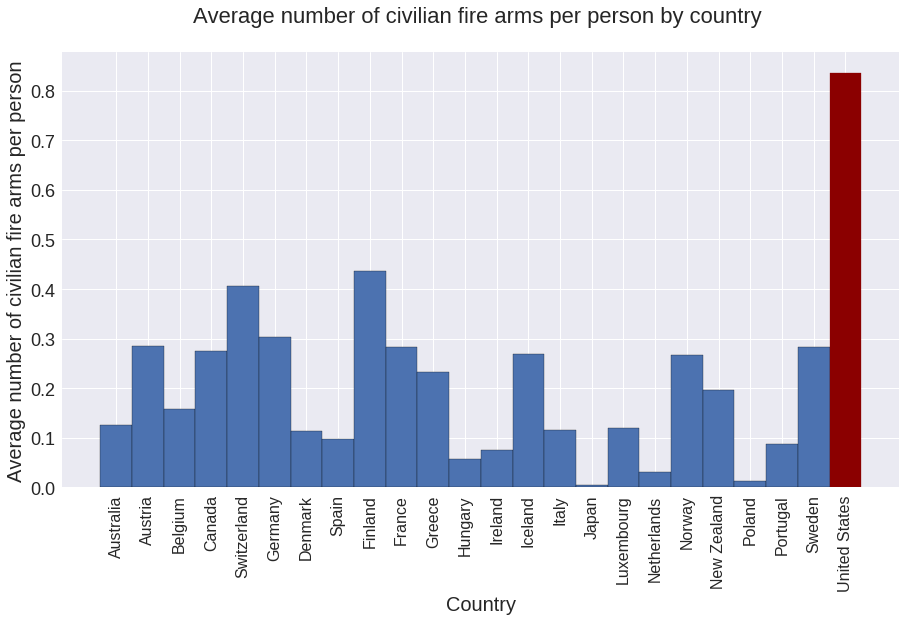

In [10]:
#without error bars

df_['Average number of civilian fire arms per person'] = df_['Average total all civilian firearms'] / df_['pop']


labels, values = df_['Country Name'], df_['Average number of civilian fire arms per person']

indexes = np.arange(len(labels))
width = 1

fig = pl.figure(figsize=(15,8)) 
pl.tick_params(axis='both',labelsize=18)
firearmschart = pl.bar(indexes, values, width, edgecolor='black' )
firearmschart[-1].set_color('darkred')
pl.xticks(indexes, labels, rotation=90 , fontsize = 16) #indexes + width * 0.5
pl.title("Average number of civilian fire arms per person by country \n", fontsize = 22)
pl.xlabel("Country", fontsize = 20)
pl.ylabel("Average number of civilian fire arms per person", fontsize = 20)
pl.show()




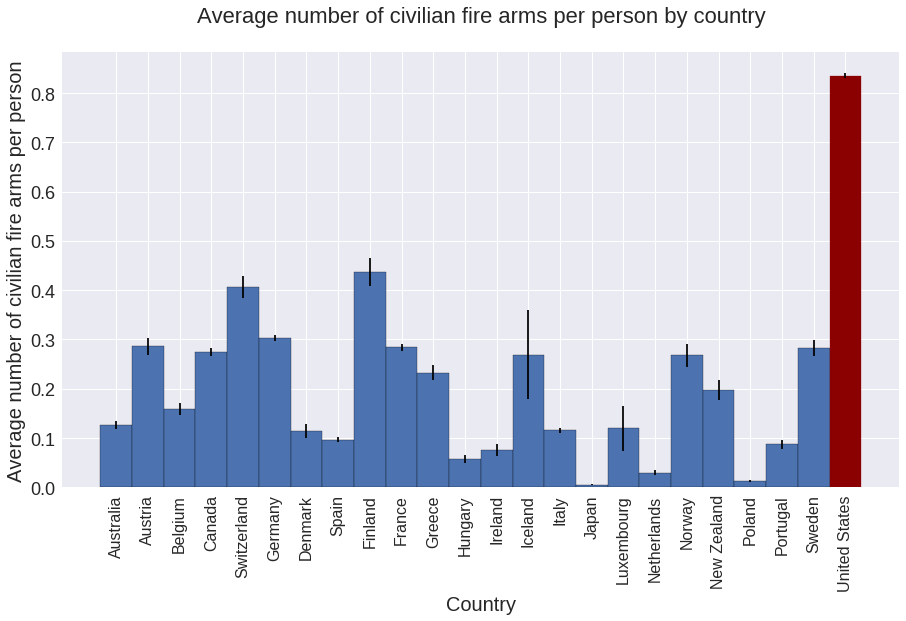

In [12]:
## WITH ERROR BARS

labels, values, errbar  = df_['Country Name'], df_['Average number of civilian fire arms per person'], np.sqrt(df_['Average total all civilian firearms']) / df_['pop']   * 1e2 

## ERROR BARS SCALED BY FACTOR OF 100

indexes = np.arange(len(labels))
width = 1



#pl.legend(fontsize=20)

fig = pl.figure(figsize=(15,8)) 
pl.tick_params(axis='both',labelsize=18)
firearmschart = pl.bar(indexes, values, width, yerr = errbar, edgecolor='black' )
firearmschart[-1].set_color('darkred')
pl.xticks(indexes, labels, rotation=90 , fontsize = 16) #indexes + width * 0.5
pl.title("Average number of civilian fire arms per person by country\n", fontsize = 22)
pl.xlabel("Country", fontsize = 20)
pl.ylabel("Average number of civilian fire arms per person", fontsize = 20)
pl.show()

In [12]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

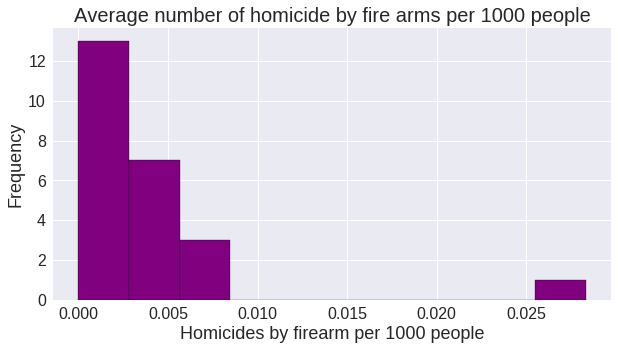

In [13]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.tick_params(axis='both',labelsize=16)
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000, color='purple', edgecolor='black')
ax.set_xlabel('Homicides by firearm per 1000 people', fontsize=18);
ax.set_ylabel("Frequency", fontsize=18)
pl.title("Average number of homicide by fire arms per 1000 people", fontsize=20);

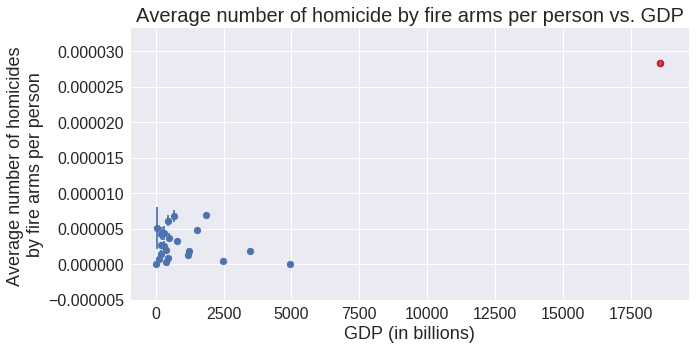

Average number of homicides by fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the most civilian firearms per person


In [19]:
#with error bars

df_['Average number of homicides by fire arms per person'] = df_['Number of homicides by firearm'] / df_['pop']

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Average number of homicides by fire arms per person'])
scatter2 = ax.scatter(df_.gdp.max() / 1e9, df_['Average number of homicides by fire arms per person'].max(),color='red')
ax.errorbar(df_.gdp / 1e9, df_['Average number of homicides by fire arms per person'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0) / df_['pop'], fmt = '.')
#ax.errorbar(df_.gdp.max() / 1e9, df_['Average number of homicides by fire arms per person'].max(), 
 #           yerr = (np.sqrt(df_['Number of homicides by firearm'] * 1.0) / df_['pop']), color='r', fmt = '.')
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel("GDP (in billions)", fontsize=18)
ax.set_ylabel("Average number of homicides \nby fire arms per person", fontsize=18)
ax.set_ylim(-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
pl.title("Average number of homicide by fire arms per person vs. GDP", fontsize=20);
pl.show()
print ("Average number of homicides by fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the most civilian firearms per person")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


### without error bars

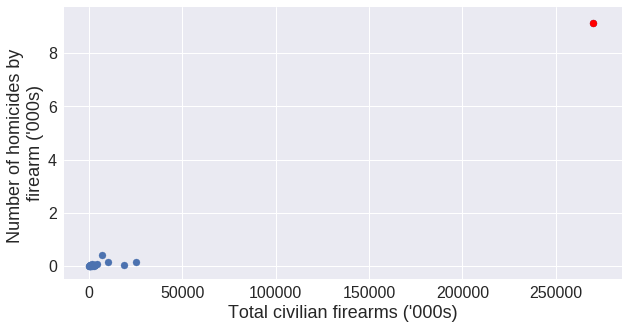

Average number of homicides by fire arms ('000s) vs Total civilian firearms ('000s), 
errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the 
highest number of homicides by firearm and the most civilian firearms


In [15]:

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of homicides by firearm'] / 1e3)
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of homicides by firearm'].max() / 1e3,color='red')
#ax.errorbar(df_['Number of homicides by firearm'] / 1e3, df_['Average total all civilian firearms'] / 1e3, 
#            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0) , fmt = '.')
ax.tick_params(axis='both',labelsize=16)
ax.set_ylabel("Number of homicides by \nfirearm ('000s)", fontsize=18)
ax.set_xlabel("Total civilian firearms ('000s)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)
pl.show()
print ("Average number of homicides by fire arms ('000s) vs Total civilian firearms ('000s), \n" + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the \nhighest number of homicides by firearm and the most civilian firearms")

### with error bars

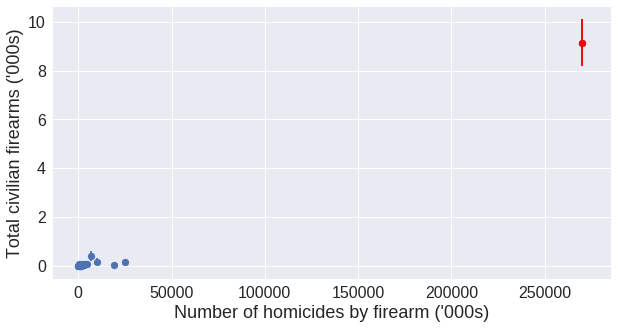

Average number of homicides by fire arms ('000s) vs Total civilian firearms ('000s), 
errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of homicides by firearm 
and the most civilian firearms


In [21]:
#FLIPPED

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of homicides by firearm'] / 1e3)
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of homicides by firearm'].max() / 1e3,color='red')
ax.errorbar(df_['Average total all civilian firearms'] / 1e3, df_['Number of homicides by firearm'] / 1e3,  
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0)/ 1e2 , fmt = '.')
errbarUS =  ax.errorbar(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of homicides by firearm'].max() / 1e3, 
           yerr = np.sqrt(df_['Number of homicides by firearm'].max() * 1.0)/ 1e2 , fmt = '.',color='red')
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel("Number of homicides by firearm ('000s)", fontsize=18)
ax.set_ylabel("Total civilian firearms ('000s)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)
pl.show()
print ("Average number of homicides by fire arms ('000s) vs Total civilian firearms ('000s), \n" + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of homicides by firearm \nand the most civilian firearms")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


### without error bars

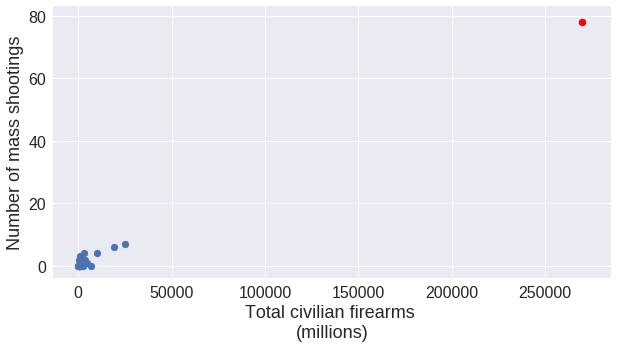

Average number of mass shootings vs Total civilian firearms ('000s), 
errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of mass shootings 
and the most civilian firearms


In [17]:
#FLIPPED

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of mass shootings'])
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of mass shootings'].max(), color='red')
#ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms'] / 1e3, 
#            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0 ) , fmt = '.')
#errbarUS =  ax.errorbar(df_['Number of mass shootings'].max(), df_['Average total all civilian firearms'].max() / 1e3, 
#            yerr = np.sqrt(df_['Average total all civilian firearms'].max() * 1.0) , fmt = '.',color='red')
ax.tick_params(axis='both',labelsize=16)
ax.set_ylabel("Number of mass shootings", fontsize=18)
ax.set_xlabel("Total civilian firearms \n(millions)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)
pl.show()
print ("Average number of mass shootings vs Total civilian firearms ('000s), \n" + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of mass shootings \nand the most civilian firearms")

### with error bars

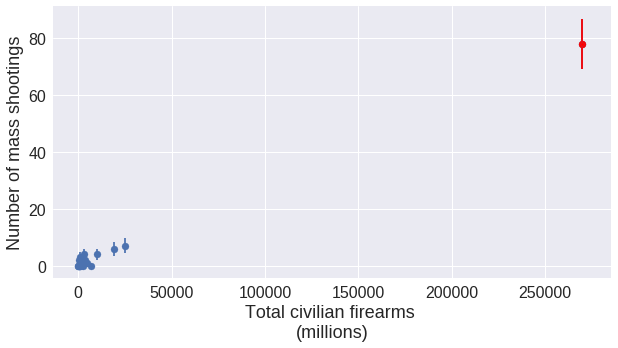

Average number of mass shootings vs Total civilian firearms ('000s), 
errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of mass shootings 
and the most civilian firearms


In [18]:
#FLIPPED

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e3, df_['Number of mass shootings'])
scatterUS = ax.scatter(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of mass shootings'].max(), color='red')
ax.errorbar(df_['Average total all civilian firearms'] / 1e3, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0 ) , fmt = '.')
errbarUS =  ax.errorbar(df_['Average total all civilian firearms'].max() / 1e3, df_['Number of mass shootings'].max(), 
            yerr = np.sqrt(df_['Number of mass shootings'].max() * 1.0) , fmt = '.',color='red')
ax.tick_params(axis='both',labelsize=16)
ax.set_ylabel("Number of mass shootings", fontsize=18)
ax.set_xlabel("Total civilian firearms \n(millions)", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)
pl.show()
print ("Average number of mass shootings vs Total civilian firearms ('000s), \n" + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of mass shootings \nand the most civilian firearms")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




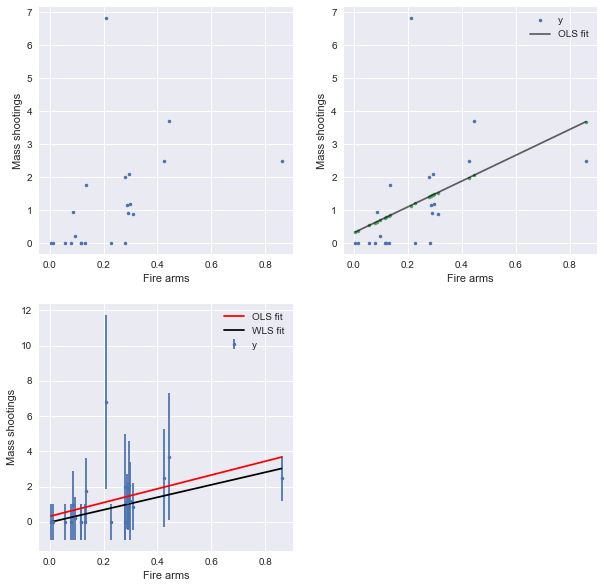

the plots should look something like this (not necessarily exactly, due to the choices of the error


In [23]:
df_.columns

Index([u'Country Name', u'pop', u'gdp', u'Number of homicides by firearm',
       u'Average total all civilian firearms', u'Country',
       u'Guns/100 inhabitants', u'Number of mass shootings', u'shootingspp',
       u'gpdpp', u'Average number of civilian fire arms per person',
       u'Average number of homicides by fire arms per person'],
      dtype='object')

In [24]:
regressDf = df_['Country Name']
regressDf['Number of mass shootings'] = df_['Number of mass shootings']
regressDf['pop'] = df_['pop']
regressDf['Number of mass shootings per person'] = df_['shootingspp']
regressDf['Average number of civilian fire arms per person'] = df_['Average number of civilian fire arms per person']


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [25]:
regressDf['shootingspmil'] = df_["Number of mass shootings"] / df_['pop'] * 1e6

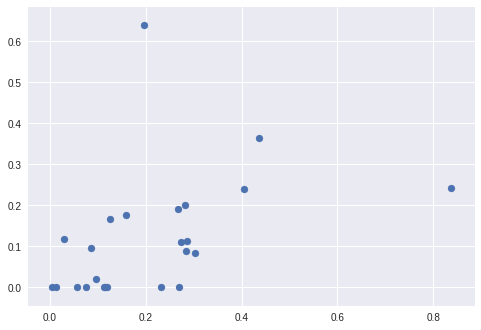

In [26]:
plt.scatter(y = regressDf['shootingspmil'],
x = regressDf['Average number of civilian fire arms per person'])

In [27]:
y = regressDf['shootingspmil']
x = regressDf['Average number of civilian fire arms per person']
x = sm.add_constant(x)

olsLM = sm.OLS(y, x).fit()

olsLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.006
Date:                Wed, 18 Oct 2017   Prob (F-statistic):             0.0357
Time:                        20:59:18   Log-Likelihood:                 14.454
No. Observations:                  24   AIC:                            -24.91
Df Residuals:                      22   BIC:                            -22.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------
const                                               0.0426      0.044      0.962      0.346        -0.049     0.134
Average number of civilian fire arms per person     0.3609      0.161      2.237      0.036         0.026     0.695
==============================================================================
Omnibus:                       33.356   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           2.544   Prob(JB):                     9.16e-19
Kurtosis:                      10.561   Cond. No.                         5.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y = regressDf['shootingspmil']
x = regressDf['Average number of civilian fire arms per person']
x = sm.add_constant(x)

shootingError = np.sqrt(regressDf['Number of mass shootings'])/(regressDf['pop']/1e5)
wlsWeight = 1 / shootingError
wlsWeightMin = wlsWeight.min()
for i in range(len(wlsWeight)):
    if shootingError[i] == 0:
        wlsWeight[i] = wlsWeightMin
        

wlsLM = sm.WLS(y, x, weights=wlsWeight).fit()

wlsLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.363
Model:                            WLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     12.52
Date:                Wed, 18 Oct 2017   Prob (F-statistic):            0.00185
Time:                        20:59:19   Log-Likelihood:                 20.785
No. Observations:                  24   AIC:                            -37.57
Df Residuals:                      22   BIC:                            -35.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------
const                                               0.0477      0.026      1.822      0.082        -0.007     0.102
Average number of civilian fire arms per person     0.2460      0.070      3.538      0.002         0.102     0.390
==============================================================================
Omnibus:                       14.947   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.272
Skew:                           1.471   Prob(JB):                     0.000483
Kurtosis:                       5.572   Cond. No.                         4.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
shootingError

0     0.008289
1     0.011432
2     0.012462
3     0.005512
4     0.016892
5     0.003200
6     0.000000
7     0.002153
8     0.025736
9     0.003662
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.008310
18    0.019110
19    0.036909
20    0.000000
21    0.009686
22    0.014280
23    0.002733
dtype: float64

In [30]:
wlsWeight

0     120.635795
1      87.473580
2      80.243602
3     181.432125
4      59.199673
5     312.454480
6      27.093316
7     464.439590
8      38.856196
9     273.102221
10     27.093316
11     27.093316
12     27.093316
13     27.093316
14     27.093316
15     27.093316
16     27.093316
17    120.338317
18     52.329290
19     27.093316
20     27.093316
21    103.246110
22     70.025647
23    365.869862
dtype: float64

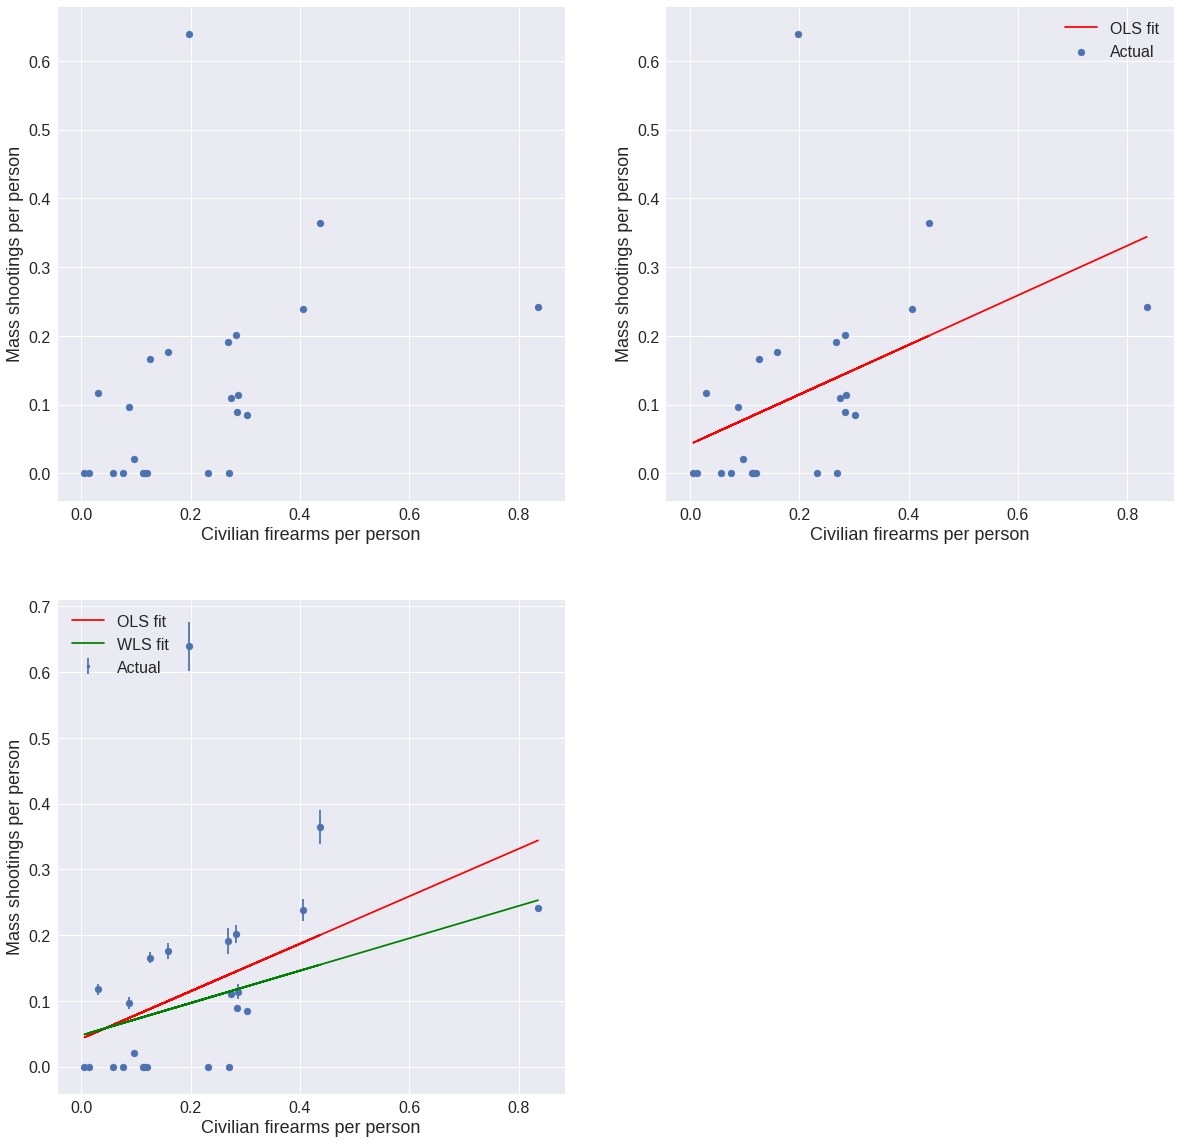

In [64]:

fig = pl.figure(figsize=(20,20)) 
ax = fig.add_subplot(221)
scatter = ax.scatter(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'])
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel("Civilian firearms per person", fontsize=18)
ax.set_ylabel("Mass shootings per person", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)


ax = fig.add_subplot(222)
scatter = ax.scatter(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'],label='Actual')
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel("Civilian firearms per person", fontsize=18)
ax.set_ylabel("Mass shootings per person", fontsize=18)
#ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
#ax.set_xlim()#0,500)
ax.plot(regressDf['Average number of civilian fire arms per person'],olsLM.fittedvalues,'-', c='red', label = 'OLS fit');
ax.legend(fontsize=16)

ax = fig.add_subplot(223)
scatter = ax.scatter(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'],label=None)
ax.errorbar(regressDf['Average number of civilian fire arms per person'], regressDf['shootingspmil'], 
            yerr = shootingError * 1.0 , fmt = '.',label='Actual')
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel("Civilian firearms per person", fontsize=18)
ax.set_ylabel("Mass shootings per person", fontsize=18)
ax.set_ylim()#0,0.32e5)#-0.000005,df_['Average number of homicides by fire arms per person'].max() + 0.000005)
ax.set_xlim()#0,500)
ax.plot(regressDf['Average number of civilian fire arms per person'],olsLM.fittedvalues,'-', c='red', label = 'OLS fit');
ax.plot(regressDf['Average number of civilian fire arms per person'],wlsLM.fittedvalues,'-', c='green', label = 'WLS fit');
ax.legend(loc='upper left', fontsize=16)


#ax = fig.add_subplot(224)
#rpLm = sns.regplot(x="Average number of civilian fire arms per person", y="shootingspmil", data=regressDf, label='OLS fit with error bands')
#rpLm.tick_params(axis='both',labelsize=16)
#rpLm.set_xlabel("Civilian firearms per person", fontsize=18)
#rpLm.set_ylabel("Mass shootings per person", fontsize=18)
#rpLm.set_ylim(-0.15,0.9);
#rpLm.legend(loc='upper left', fontsize=16)


pl.show()

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



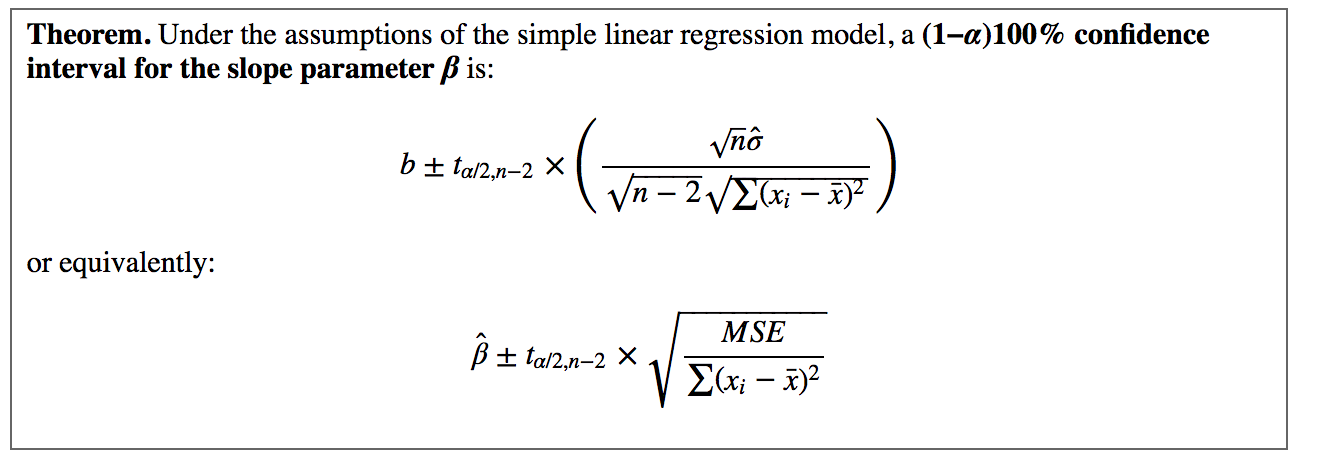

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

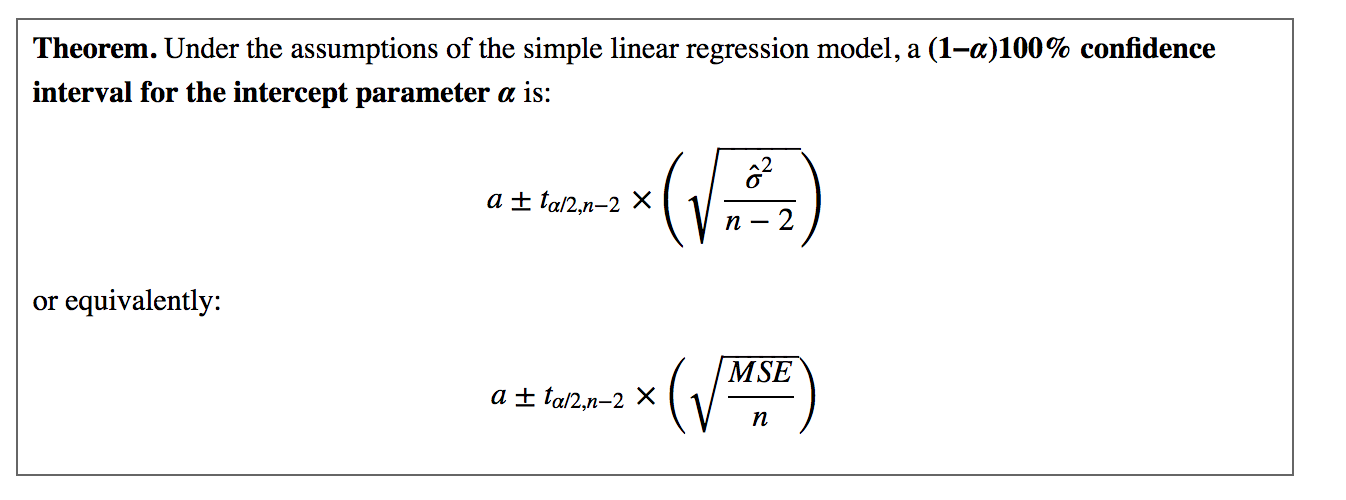

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

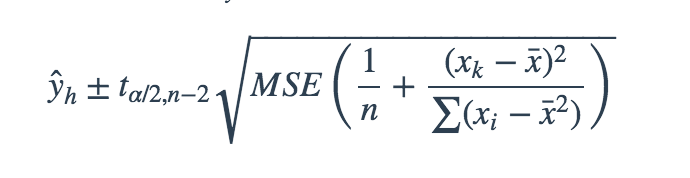

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

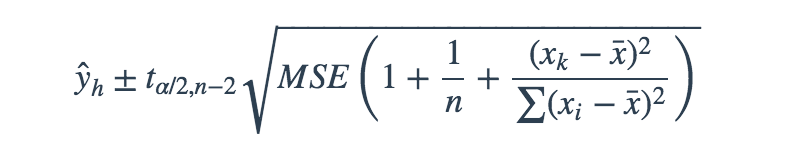

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

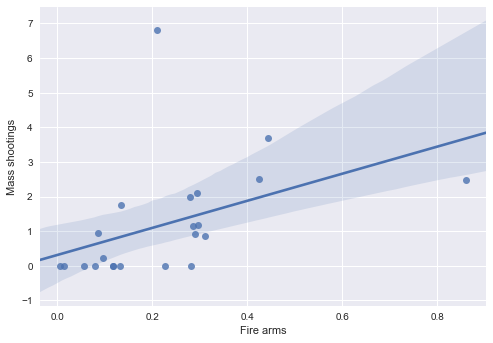

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

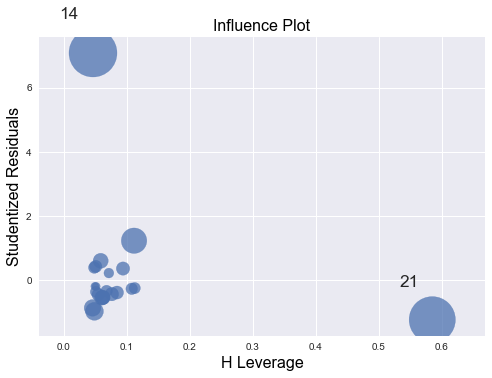

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

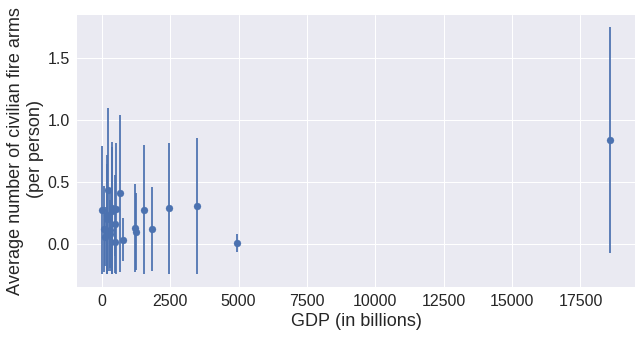

Average number of civilian fire arms (per person) vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the most civilian firearms per person


In [15]:
#without error bars

df_['Average number of civilian fire arms per person'] = df_['Average total all civilian firearms'] / df_['pop']

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Average number of civilian fire arms per person'])
ax.errorbar(df_.gdp / 1e9, df_['Average number of civilian fire arms per person'], 
            yerr = np.sqrt(df_['Average number of civilian fire arms per person'] * 1.0), fmt = '.')
ax.tick_params(axis='both',labelsize=16)
ax.set_xlabel("GDP (in billions)", fontsize=18)
ax.set_ylabel("Average number of civilian fire arms\n (per person)", fontsize=18)
ax.set_ylim()
pl.show()
print ("Average number of civilian fire arms (per person) vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the most civilian firearms per person")